In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
import scipy.stats as stats
from IPython.display import display
from scipy.stats import mannwhitneyu

In [4]:
df = pd.read_excel("suboffer_be.xlsx")

df

,legal_entity,be_id,supplier_id,so_id,system_status,create_ts,available,second,time
0,АО «Полюс Логистика»,3,458,22539,RC_ACCEPTED,2024-01-31 02:11:14.357,True,119921,0 years 0 mons 1 days 9 hours 18 mins 41.36649...
1,АО «СУЭК-Красноярск»,7,19,14636,CANCELED,2023-12-07 09:08:25.058,False,71067,0 years 0 mons 0 days 19 hours 44 mins 27.4093...
2,АО «СУЭК-Красноярск»,8,1,30105,READY,2024-03-06 06:00:49.527,False,766041,0 years 0 mons 8 days 20 hours 47 mins 21.1300...
3,АО “Полюс Красноярск”,1,442,30624,SHIPPED,2024-03-09 08:35:49.964,True,246398,0 years 0 mons 2 days 20 hours 26 mins 38.0263...
4,АО «Полюс Алдан»,530,129,27430,SHIPPED,2024-02-21 12:26:31.525,False,61598,0 years 0 mons 0 days 17 hours 6 mins 38.07275...
...,...,...,...,...,...,...,...,...,...
16125,АО “Полюс Красноярск”,1,14,30655,RETURNED,2024-03-09 11:04:22.964,False,511318,0 years 0 mons 5 days 22 hours 1 mins 58.64121...
16126,АО “Полюс Красноярск”,1,855,26371,SHIPPED,2024-02-17 06:02:47.957,False,10330,0 years 0 mons 0 days 2 hours 52 mins 10.14830...
16127,"ПАО ""НЛМК""",1143,442,25693,RC_READY,2024-02-14 16:30:46.532,True,390910,0 years 0 mons 4 days 12 hours 35 mins 10.9675...
16128,"ПАО ""НЛМК""",1143,610,25699,RC_READY,2024-02-14 16:30:46.532,True,49408,0 years 0 mons 0 days 13 hours 43 mins 28.8926...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16130 entries, 0 to 16129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   legal_entity   16130 non-null  object        
 1   be_id          16130 non-null  int64         
 2   supplier_id    16130 non-null  int64         
 3   so_id          16130 non-null  int64         
 4   system_status  16130 non-null  object        
 5   create_ts      16130 non-null  datetime64[ns]
 6   available      16130 non-null  bool          
 7   second         16130 non-null  int64         
 8   time           16130 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(4), object(3)
memory usage: 1.0+ MB


In [6]:
df['days'] = df['second'] / 60 / 60 / 24
df['days'] = np.floor(df['days'])
df

,legal_entity,be_id,supplier_id,so_id,system_status,create_ts,available,second,time,days
0,АО «Полюс Логистика»,3,458,22539,RC_ACCEPTED,2024-01-31 02:11:14.357,True,119921,0 years 0 mons 1 days 9 hours 18 mins 41.36649...,1.0
1,АО «СУЭК-Красноярск»,7,19,14636,CANCELED,2023-12-07 09:08:25.058,False,71067,0 years 0 mons 0 days 19 hours 44 mins 27.4093...,0.0
2,АО «СУЭК-Красноярск»,8,1,30105,READY,2024-03-06 06:00:49.527,False,766041,0 years 0 mons 8 days 20 hours 47 mins 21.1300...,8.0
3,АО “Полюс Красноярск”,1,442,30624,SHIPPED,2024-03-09 08:35:49.964,True,246398,0 years 0 mons 2 days 20 hours 26 mins 38.0263...,2.0
4,АО «Полюс Алдан»,530,129,27430,SHIPPED,2024-02-21 12:26:31.525,False,61598,0 years 0 mons 0 days 17 hours 6 mins 38.07275...,0.0
...,...,...,...,...,...,...,...,...,...,...
16125,АО “Полюс Красноярск”,1,14,30655,RETURNED,2024-03-09 11:04:22.964,False,511318,0 years 0 mons 5 days 22 hours 1 mins 58.64121...,5.0
16126,АО “Полюс Красноярск”,1,855,26371,SHIPPED,2024-02-17 06:02:47.957,False,10330,0 years 0 mons 0 days 2 hours 52 mins 10.14830...,0.0
16127,"ПАО ""НЛМК""",1143,442,25693,RC_READY,2024-02-14 16:30:46.532,True,390910,0 years 0 mons 4 days 12 hours 35 mins 10.9675...,4.0
16128,"ПАО ""НЛМК""",1143,610,25699,RC_READY,2024-02-14 16:30:46.532,True,49408,0 years 0 mons 0 days 13 hours 43 mins 28.8926...,0.0


## Общий анализ распределений

    Создам сводную таблицу со столбцами: 
        БЕ
        Время согласования 
        Кол-во строк в выборке 
        Кол-во строк со временем больше 10 дней 
        Процент таких строк от общего
 
    В разрезе с CANCELED:

In [36]:
df1 = df[df['system_status'] == 'CANCELED']

average_time = df1.groupby('legal_entity')['second'].mean()/(60*60*24)
average_time = average_time.reset_index()
average_time.rename(columns={'second': 'days'}, inplace=True)
average_time['days'] = round(average_time['days'], 2)
average_time = average_time.sort_values('days', ascending=False)

# считаем количество значений в каждом legal_entity
count_values = df1['legal_entity'].value_counts().reset_index()
count_values.columns = ['legal_entity', 'value_count']

# объединяем с average_time
average_time = average_time.merge(count_values, on='legal_entity')

# удаляем все строки с suboffer_count < 200 из-за недостатка инфы
average_time.drop(average_time[average_time['value_count'] < 1].index, inplace=True)
average_time.rename(columns={'value_count': 'suboffer_count'}, inplace=True)

initial_count_days_gt_10 = df1[df1['days'] > 10].groupby('legal_entity').size().reset_index(name='10+ days')
average_time = average_time.merge(initial_count_days_gt_10, on='legal_entity', how='left')
average_time.fillna(0, inplace=True)

average_time['%'] = (average_time['10+ days'] / average_time['suboffer_count']) * 100
average_time['10+ days'] = average_time['10+ days'].astype(int)

average_time

,legal_entity,days,suboffer_count,10+ days,%
0,АО «Полюс Алдан»,6.47,147,31,21.088435
1,"ООО ""НевРСС""",4.69,14,1,7.142857
2,АО «Полюс Магадан»,4.52,488,38,7.786885
3,"АО ""НАК ""Азот""",4.28,184,20,10.869565
4,ООО «ЕСК-СУЭК»,4.00,77,7,9.090909
5,АО «УПиР»,3.84,5,1,20.000000
6,АО “Полюс Красноярск”,3.82,980,65,6.632653
7,АО «Полюс Вернинское»,3.61,88,7,7.954545
8,ООО «СИБ - ДАМЕЛЬ»,3.45,5,0,0.000000
9,"ООО ""ЕвроХим - УКК""",3.40,10,0,0.000000


    В разрезе без CANCELED:

In [37]:
df2 = df[df['system_status'] != 'CANCELED']

average_time = df2.groupby('legal_entity')['second'].mean()/(60*60*24)
average_time = average_time.reset_index()
average_time.rename(columns={'second': 'days'}, inplace=True)
average_time['days'] = round(average_time['days'], 2)
average_time = average_time.sort_values('days', ascending=False)

# считаем количество значений в каждом legal_entity
count_values = df2['legal_entity'].value_counts().reset_index()
count_values.columns = ['legal_entity', 'value_count']

# объединяем с average_time
average_time = average_time.merge(count_values, on='legal_entity')

# удаляем все строки с suboffer_count < 200 из-за недостатка инфы
average_time.drop(average_time[average_time['value_count'] < 1].index, inplace=True)
average_time.rename(columns={'value_count': 'suboffer_count'}, inplace=True)

initial_count_days_gt_10 = df2[df2['days'] > 10].groupby('legal_entity').size().reset_index(name='10+ days')
average_time = average_time.merge(initial_count_days_gt_10, on='legal_entity', how='left')
average_time.fillna(0, inplace=True)

average_time['%'] = (average_time['10+ days'] / average_time['suboffer_count']) * 100
average_time['10+ days'] = average_time['10+ days'].astype(int)

average_time

,legal_entity,days,suboffer_count,10+ days,%
0,АО «Полюс Алдан»,2.54,279,15,5.376344
1,"АО ""Невинномысский Азот""",2.27,107,6,5.607477
2,"ООО ""ЕвроХим-ВолгаКалий""",1.92,347,8,2.305476
3,АО «Полюс Вернинское»,1.79,333,7,2.102102
4,ООО «ЕСК-СУЭК»,1.74,236,8,3.389831
5,"ПАО ""НЛМК""",1.69,820,12,1.463415
6,АО «Полюс Логистика»,1.59,2139,52,2.431043
7,АО “Полюс Красноярск”,1.50,3437,51,1.483852
8,АО «Полюс Магадан»,1.39,878,9,1.025057
9,"АО ""НАК ""Азот""",1.34,485,9,1.855670


Как видно, 

    Вывод: время согласования сильно зависит от статуса CANCELED

### Аналитика статуса CANCELED

In [110]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

    Статусы CANCELED сортировкой по уменьшающейся пропорции выбросов:

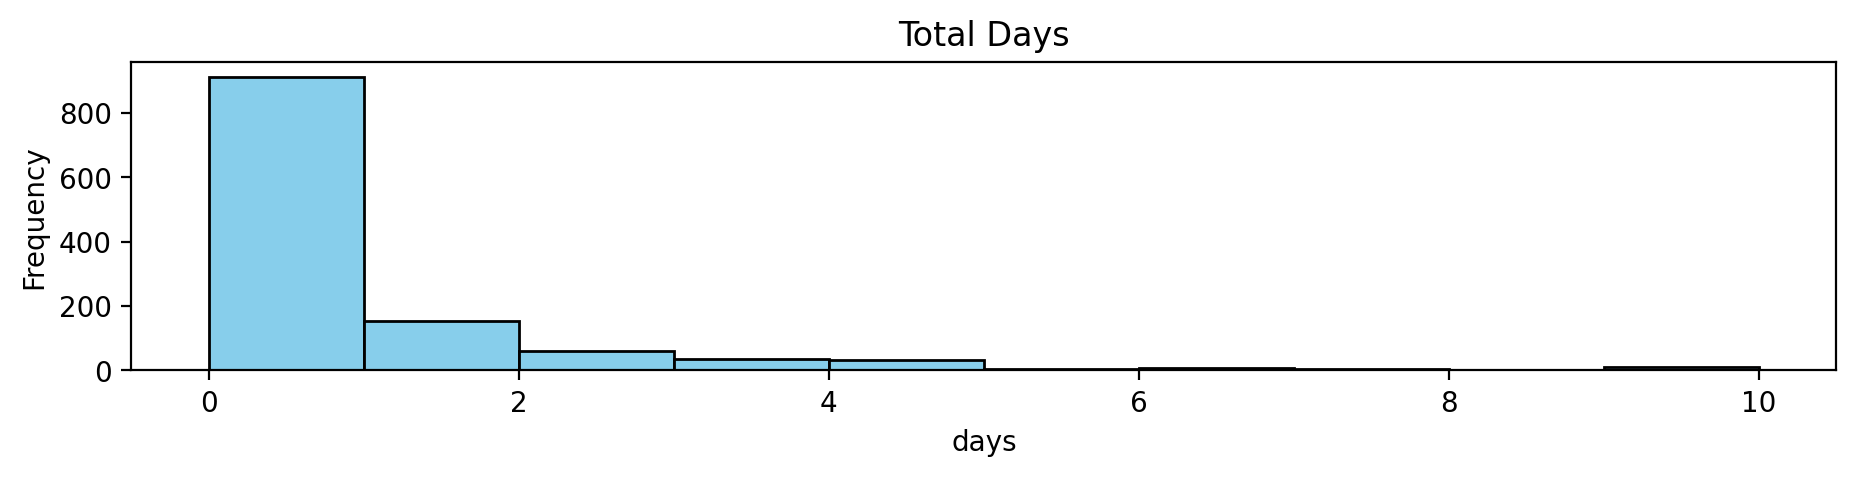

In [211]:
df_copy = df1.copy()
df_copy.loc[df_copy['days'] > 10, 'days'] = 10

freq = df_copy['days']  # Используем все значения 'days' без разделения по 'legal_entity'

zero_days = freq[freq == 0].count()
ten_days = freq[freq == 10].count()
ratio = zero_days / ten_days if ten_days != 0 else float('inf')

plt.figure(figsize=(11, 2))
plt.hist(data_location_capped, bins=10, color='skyblue', edgecolor='black')
plt.title('Total Days')
plt.xlabel('days')
plt.ylabel('Frequency')
plt.show()

    Статусы NOT CANCELED сортировкой по уменьшающейся пропорции выбросов:

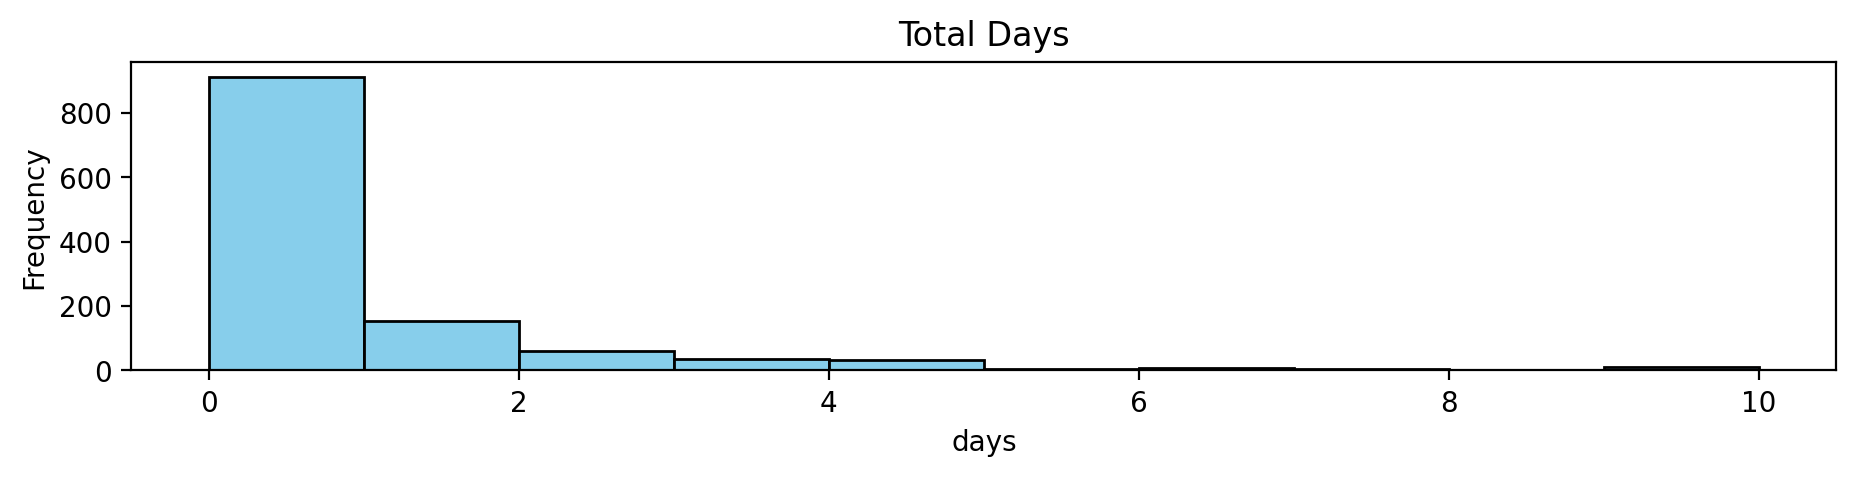

In [210]:
df_copy = df2.copy()
df_copy.loc[df_copy['days'] > 10, 'days'] = 10

freq = df_copy['days']  # Используем все значения 'days' без разделения по 'legal_entity'

zero_days = freq[freq == 0].count()
ten_days = freq[freq == 10].count()
ratio = zero_days / ten_days if ten_days != 0 else float('inf')

plt.figure(figsize=(11, 2))
plt.hist(data_location_capped, bins=10, color='skyblue', edgecolor='black')
plt.title('Total Days')
plt.xlabel('days')
plt.ylabel('Frequency')
plt.show()

    Подтвердим гипотезу о том, что выборка CANCELED отличается от NOT CANCELED и составляет несвязанное распределение, которое нужно рассматривать отдельно:

In [115]:
# Проведем критерий Манна-Уитни для проверки гипотезы
statistic, p_value = mannwhitneyu(df1['days'], df2['days'])

# Выведем результаты теста
print(f"Статистика критерия: {statistic}")
print(f"p-значение: {p_value}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу - существует статистически значимая разница между df1 и df2.")
else:
    print("Не удалось отвергнуть нулевую гипотезу - нет статистически значимой разницы между df1 и df2.")

Статистика критерия: 31288519.0
p-значение: 2.059253583918068e-205
Отвергаем нулевую гипотезу - существует статистически значимая разница между df1 и df2.


##### ВЫВОД: подтверждение подзаказов, что в итоге стали отмененными (CANCELED) гарантированно занимает наибольшее количество дней.
    
    Необходимо убрать подзаказы со статусом CANCELED от дальнейшего исследования с подтвержденной гипотезой, что существует статистически значимая разница между данными подзаказами.

### Анализ зависимости времени подтверждения заказа при NOT CANCELED  относительно Available (были в стоке во время заказа)

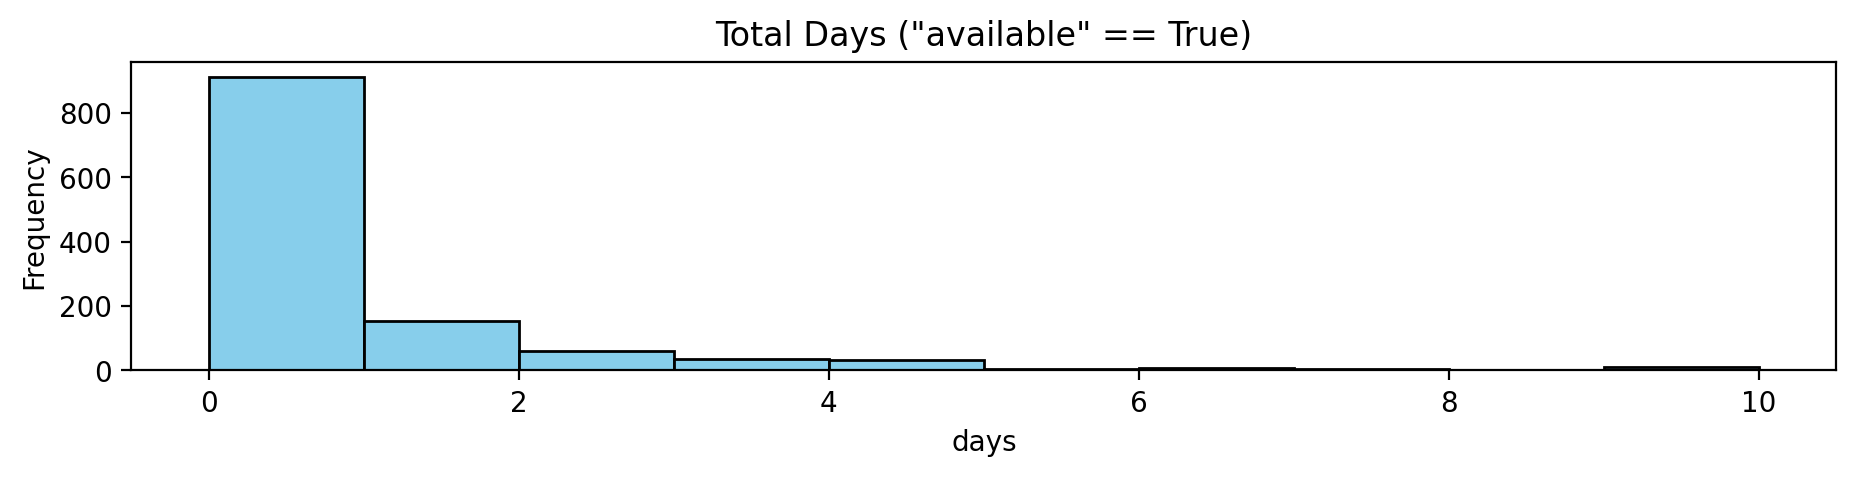

In [208]:
available = df_copy.loc[df_copy['available'] == True]['days']

zero_days_filtered = available[available == 0].count()
ten_days_filtered = available[available == 10].count()
ratio_filtered = zero_days_filtered / ten_days_filtered if ten_days_filtered != 0 else float('inf')

plt.figure(figsize=(11, 2))
plt.hist(data_location_capped, bins=10, color='skyblue', edgecolor='black')
plt.title('Total Days ("available" == True)')
plt.xlabel('days')
plt.ylabel('Frequency')
plt.show()

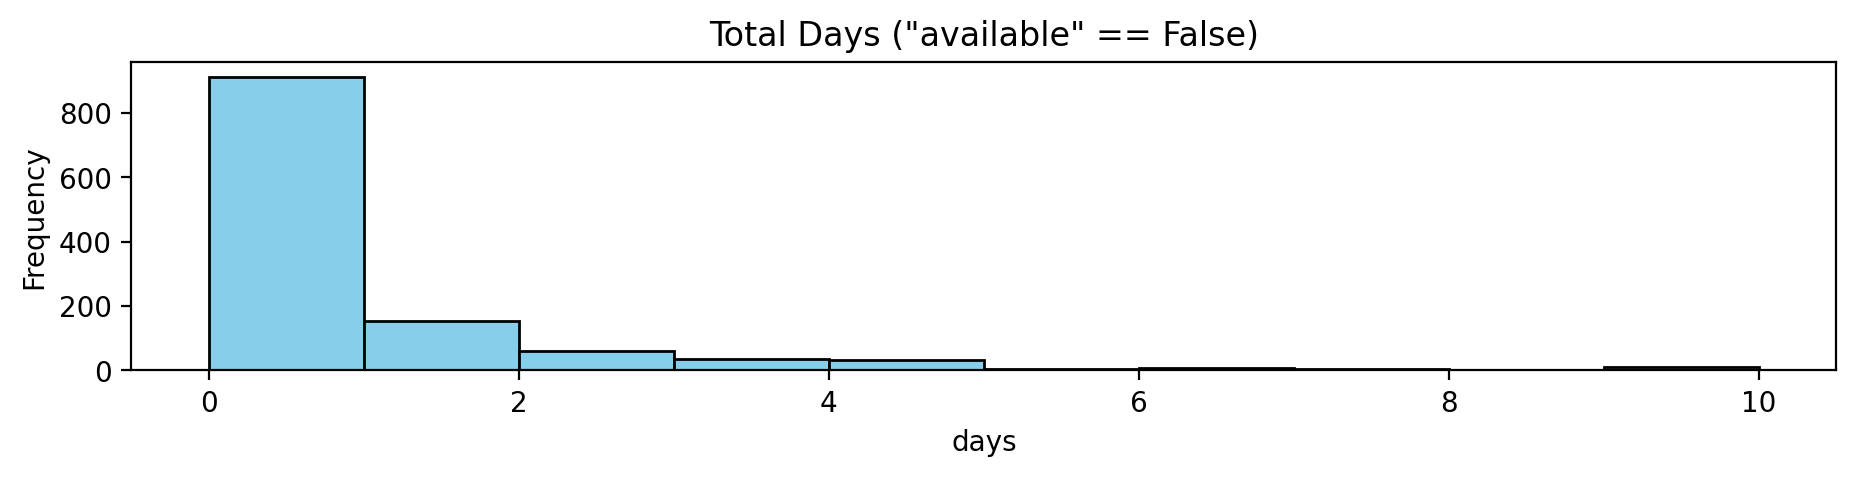

In [209]:
not_available = df_copy.loc[df_copy['available'] == False]['days']

zero_days_filtered = not_available[not_available == 0].count()
ten_days_filtered = not_available[not_available == 10].count()
ratio_filtered = zero_days_filtered / ten_days_filtered if ten_days_filtered != 0 else float('inf')

plt.figure(figsize=(11, 2))
plt.hist(data_location_capped, bins=10, color='skyblue', edgecolor='black')
plt.title('Total Days ("available" == False)')
plt.xlabel('days')
plt.ylabel('Frequency')
plt.show()

    Проведем двусторонний тест Манна-Уитни, который просто наличие статистически значимых различий между значениями 'days' для 'available' равно True и False, с выяснением какой параметр больше.

In [143]:
available_days = df_copy.loc[df_copy['available'] == True]['days']
not_available_days = df_copy.loc[df_copy['available'] == False]['days']

statistic, p_value = mannwhitneyu(not_available_days, available_days)
print("Mann-Whitney U статистика:", statistic)
print("p-значение:", p_value)

if p_value < 0.05:
    print("Результаты теста являются статистически значимыми.")
else:
    print("Результаты теста не являются статистически значимыми. Нельзя сделать однозначные выводы о различиях между значениями 'days' для 'available' равно True и False.")
if statistic > 0:
    print("Значения 'days' для 'available' равно False имеют статистически значимо более высокие значения, чем для 'available' равно True.")
else:
    print("Значения 'days' для 'available' равно True имеют статистически значимо более высокие значения, чем для 'available' равно False.")


Mann-Whitney U статистика: 18158011.5
p-значение: 0.8657996539571393
Результаты теста не являются статистически значимыми. Нельзя сделать однозначные выводы о различиях между значениями 'days' для 'available' равно True и False.
Значения 'days' для 'available' равно False имеют статистически значимо более высокие значения, чем для 'available' равно True.


    Гипотеза о различии продолжительности времени согласования в зависимости от статуса наличия 'available' отклонена.
    Хотя 'available' = False имеют статистически значимо более высокие значения, чем для 'available' = True

##### Вывод: разница продолжительности в днях относительно статуса наличия 'available' - являются статистической погрешностью.

    С таким выводом можно рассматривать эти события совместро для выборки NOT CANCELED

### Анализ зависимости при NOT CANCELED относительно Поставщика

In [182]:
average_time = df2.groupby('supplier_id')['second'].mean()/(60*60*24)
average_time = average_time.reset_index()
average_time.rename(columns={'second': 'days'}, inplace=True)
average_time['days'] = round(average_time['days'], 2)
average_time = average_time.sort_values('days', ascending=False)

# считаем количество значений в каждом legal_entity
count_values = df2['supplier_id'].value_counts().reset_index()
count_values.columns = ['supplier_id', 'value_count']

# объединяем с average_time
average_time = average_time.merge(count_values, on='supplier_id')

# удаляем все строки с suboffer_count < 200 из-за недостатка инфы
average_time.drop(average_time[average_time['value_count'] < 1].index, inplace=True)
average_time.rename(columns={'value_count': 'suboffer_count'}, inplace=True)

initial_count_days_gt_10 = df2[df2['days'] > 10].groupby('supplier_id').size().reset_index(name='10+ days')
average_time = average_time.merge(initial_count_days_gt_10, on='supplier_id', how='left')
average_time.fillna(0, inplace=True)

average_time['%'] = (average_time['10+ days'] / average_time['suboffer_count']) * 100

filtered_average_time = average_time[average_time['suboffer_count'] > 100].sort_values(by='days', ascending=False)
filtered_average_time

,supplier_id,days,suboffer_count,10+ days,%
3,14,6.07,103,14.0,13.592233
25,91,2.65,173,15.0,8.670520
31,90,2.30,107,2.0,1.869159
32,1,2.28,995,21.0,2.110553
33,18,2.27,1072,37.0,3.451493
34,200,2.22,108,1.0,0.925926
40,1171,2.09,140,3.0,2.142857
41,11,2.05,156,3.0,1.923077
43,82,2.03,243,11.0,4.526749
44,442,2.02,654,7.0,1.070336


In [178]:
locations = df2['supplier_id'].unique()
results = []

for location in locations:
    data_location = df2[df2['supplier_id'] == location]['days']
    
    num_rows_location = len(data_location)  # Количество строк в текущей локации
    
    if num_rows_location >= 100:
        other_locations = df2[df2['supplier_id'] != location]['days']
        
        # Проведение критерия Манна-Уитни
        stat, p_value = mannwhitneyu(data_location, other_locations, alternative='two-sided')
        
        results.append({'location': location, 'p_value': p_value, 'num_rows': num_rows_location})

# Сортировка результатов по увеличению p-value
results.sort(key=lambda x: x['p_value'])

for result in results:
    print(f"Поставщик: {result['location']}, Количество строк: {result['num_rows']}, p-value: {result['p_value']}\n")

# Вывод
if results[0]['p_value'] < 0.05:
    print("Существует статистически значимая разница во времени ожидания в зависимоти от Поставщика.")
else:
    print("Нет статистически значимой разницы во времени ожидания в зависимоти от Поставщика.")

Поставщик: 1, Количество строк: 995, p-value: 1.629598694168497e-108

Поставщик: 304, Количество строк: 1400, p-value: 3.718975645744203e-93

Поставщик: 14, Количество строк: 103, p-value: 1.0549158537483572e-42

Поставщик: 442, Количество строк: 654, p-value: 1.3946253392321415e-42

Поставщик: 8, Количество строк: 902, p-value: 1.3934370502197337e-35

Поставщик: 18, Количество строк: 1072, p-value: 1.9176072450202067e-34

Поставщик: 145, Количество строк: 263, p-value: 1.1218842752559969e-13

Поставщик: 855, Количество строк: 211, p-value: 9.973079453165687e-12

Поставщик: 90, Количество строк: 107, p-value: 1.9584717431196404e-10

Поставщик: 305, Количество строк: 102, p-value: 9.53516329376585e-09

Поставщик: 200, Количество строк: 108, p-value: 2.5630637287466088e-08

Поставщик: 530, Количество строк: 102, p-value: 2.2731738334222133e-07

Поставщик: 869, Количество строк: 292, p-value: 5.250191677204825e-07

Поставщик: 11, Количество строк: 156, p-value: 1.6167140012420728e-05

Пос

In [198]:
locations = df2['supplier_id'].unique()
results = []

for location in locations:
    data_location = df2[df2['supplier_id'] == location]['days']
    
    num_rows_location = len(data_location)  # Количество строк в текущей локации
    
    if num_rows_location >= 100:
        other_locations = df2[df2['supplier_id'] != location]['days']
        
        # Проведение критерия Манна-Уитни
        stat, p_value = mannwhitneyu(data_location, other_locations, alternative='greater')  # Используем одностороннюю гипотезу
        
        results.append((location, num_rows_location, p_value))

# Сортировка результатов по возрастанию p-value
results_sorted = sorted(results, key=lambda x: x[2])

for result in results_sorted:
    location, num_rows_location, p_value = result
    if p_value < 0.05:
        print(f"Поставщик: {location}, Количество строк: {num_rows_location}, p-value: {p_value}")
        print("Распределение времени ожидания заказа данного Поставщика статистически больше, чем у других.\n")
    else:
        print(f"Поставщик: {location}, Количество строк: {num_rows_location}, p-value: {p_value}")
        print("Распределение времени ожидания заказа данного Поставщика статистически не больше, чем у других.\n")

Поставщик: 1, Количество строк: 995, p-value: 8.147993470842485e-109
Распределение времени ожидания заказа данного Поставщика статистически больше, чем у других.

Поставщик: 14, Количество строк: 103, p-value: 5.274579268741786e-43
Распределение времени ожидания заказа данного Поставщика статистически больше, чем у других.

Поставщик: 442, Количество строк: 654, p-value: 6.973126696160708e-43
Распределение времени ожидания заказа данного Поставщика статистически больше, чем у других.

Поставщик: 18, Количество строк: 1072, p-value: 9.588036225101034e-35
Распределение времени ожидания заказа данного Поставщика статистически больше, чем у других.

Поставщик: 90, Количество строк: 107, p-value: 9.792358715598202e-11
Распределение времени ожидания заказа данного Поставщика статистически больше, чем у других.

Поставщик: 200, Количество строк: 108, p-value: 1.2815318643733044e-08
Распределение времени ожидания заказа данного Поставщика статистически больше, чем у других.

Поставщик: 11, Кол

    Существует статистически значимая разница во времени ожидания заказа между БЕ. Приоритет отсортирован по уменьшению актуальности.
    
        Взглянем на гистограммы распределения для сравнения трех худших по времени ожидания с тремя лучшими поставщиками:

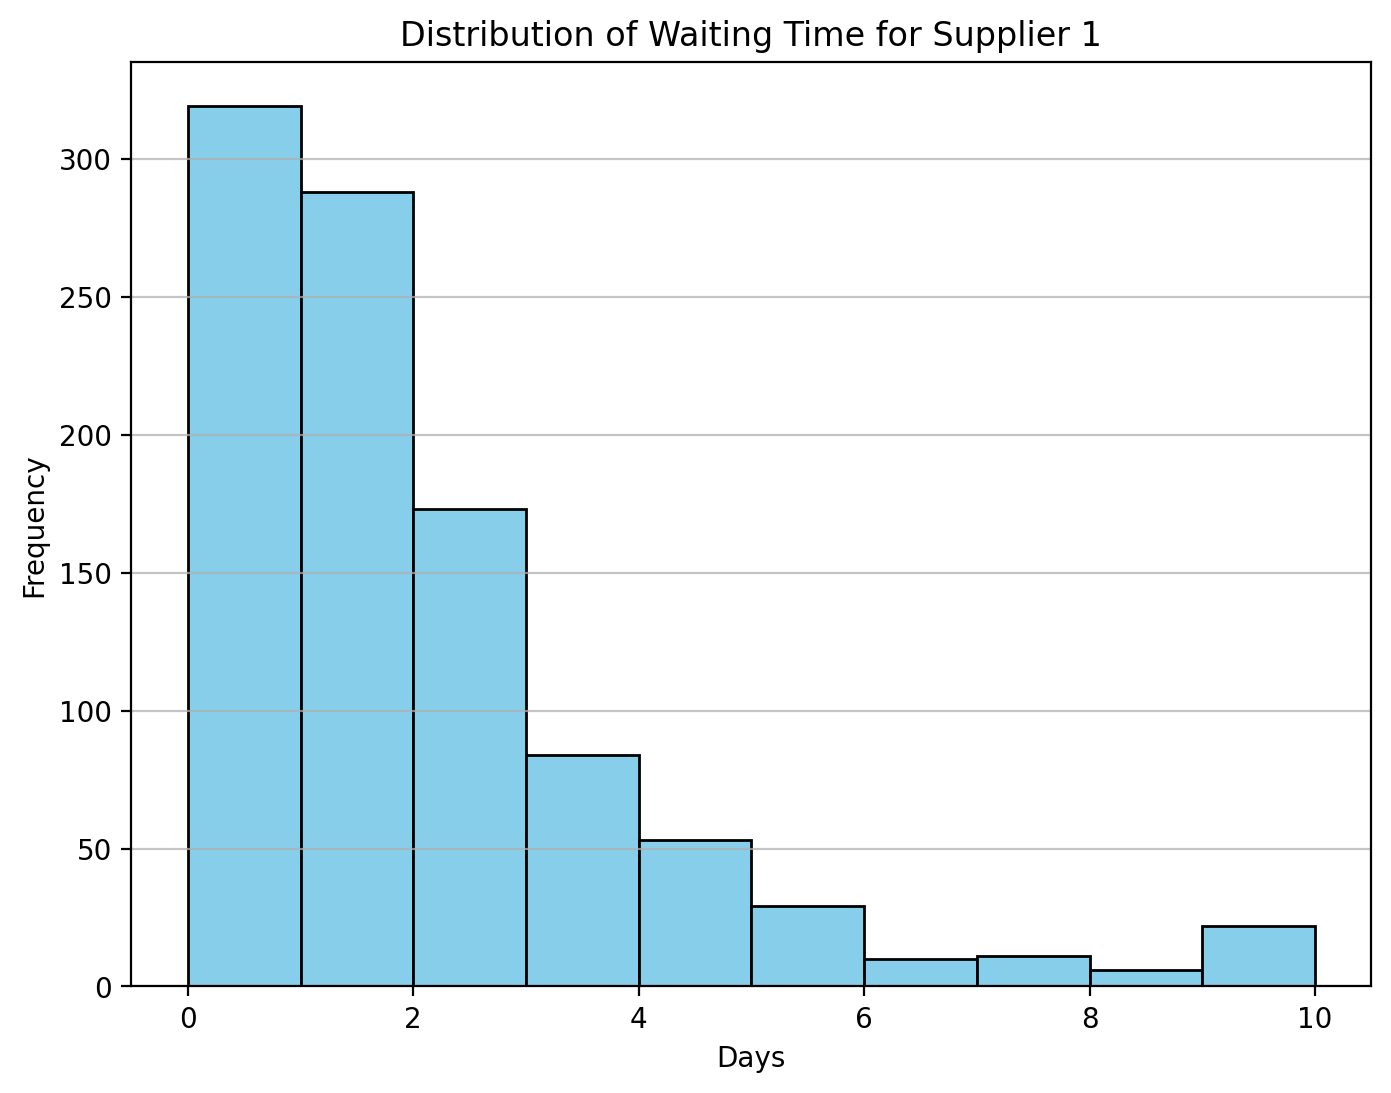

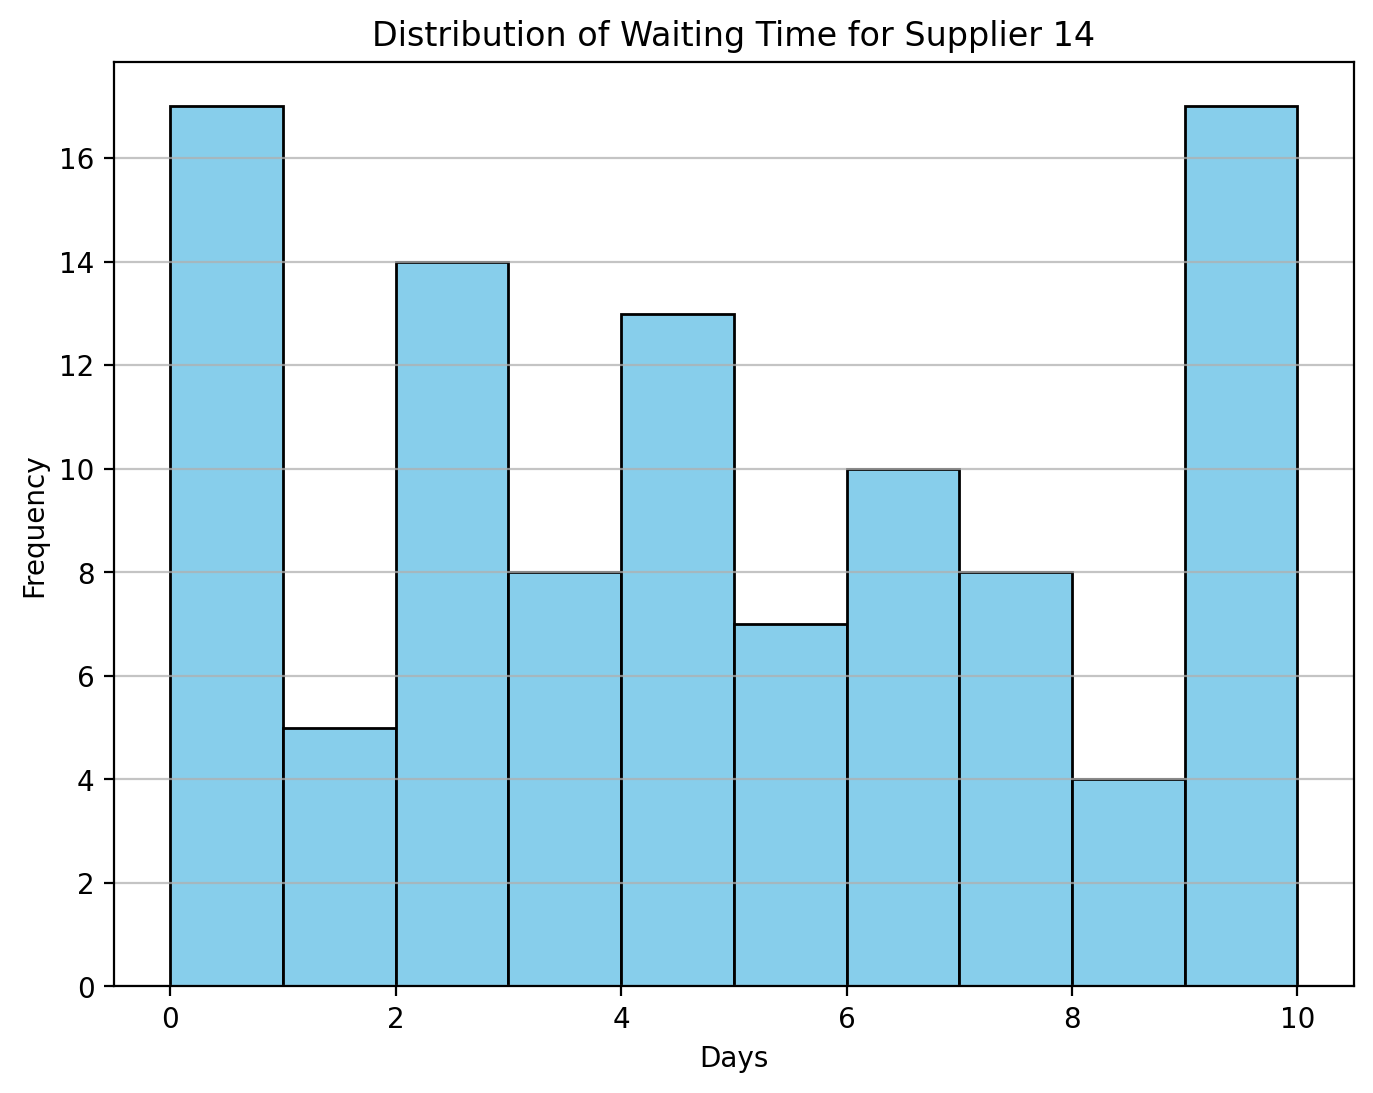

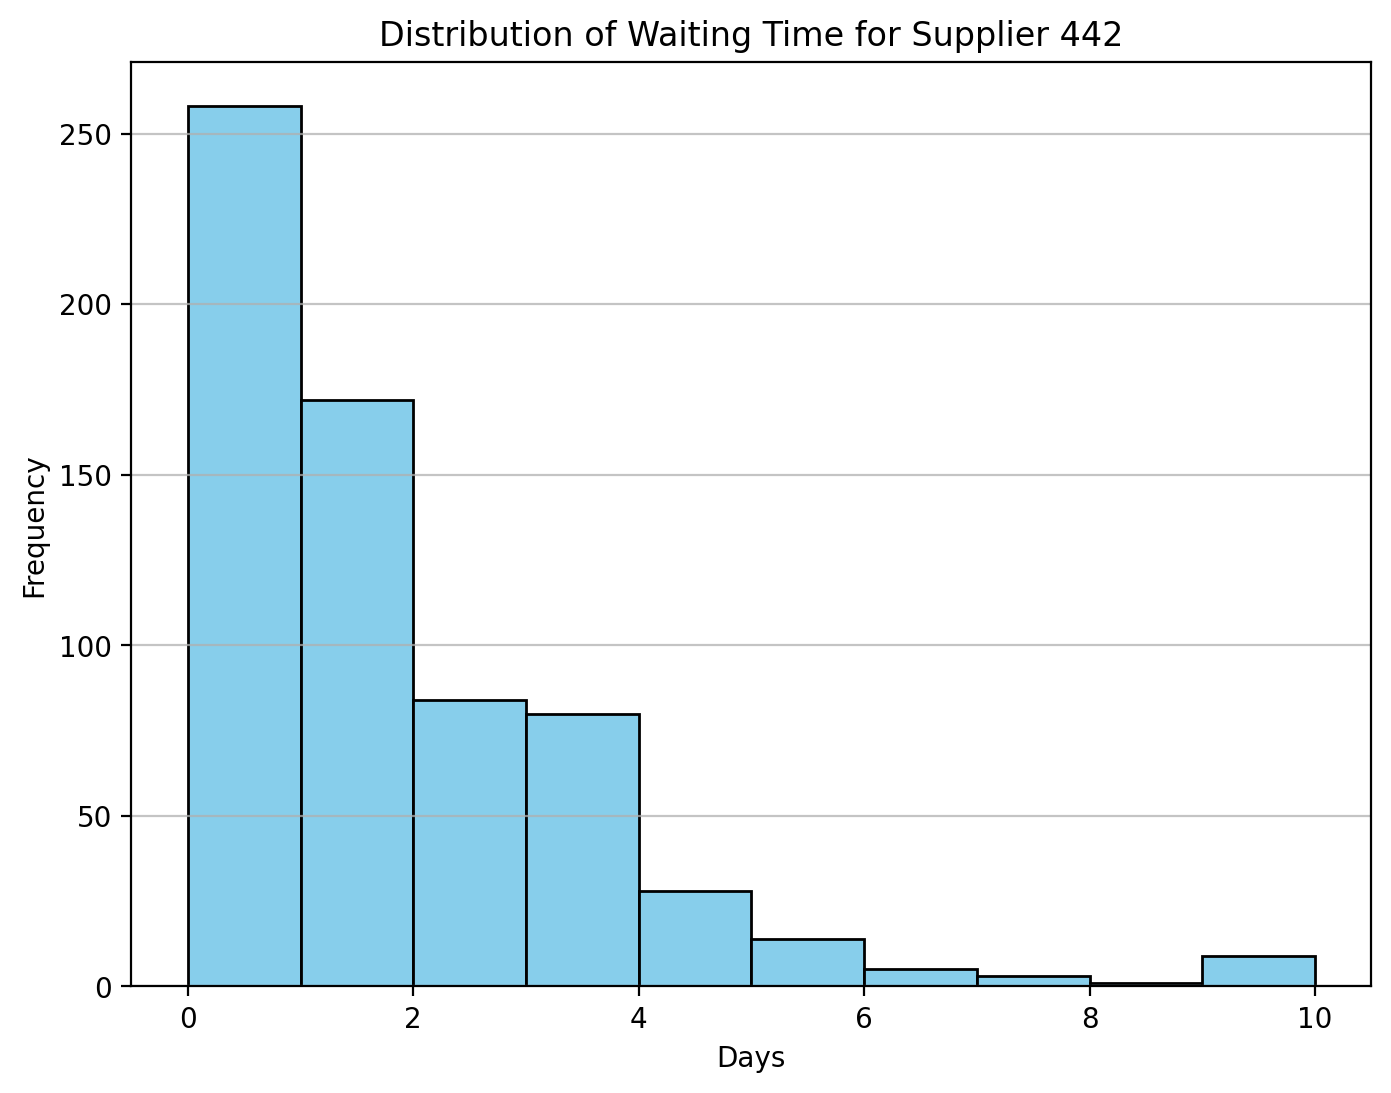

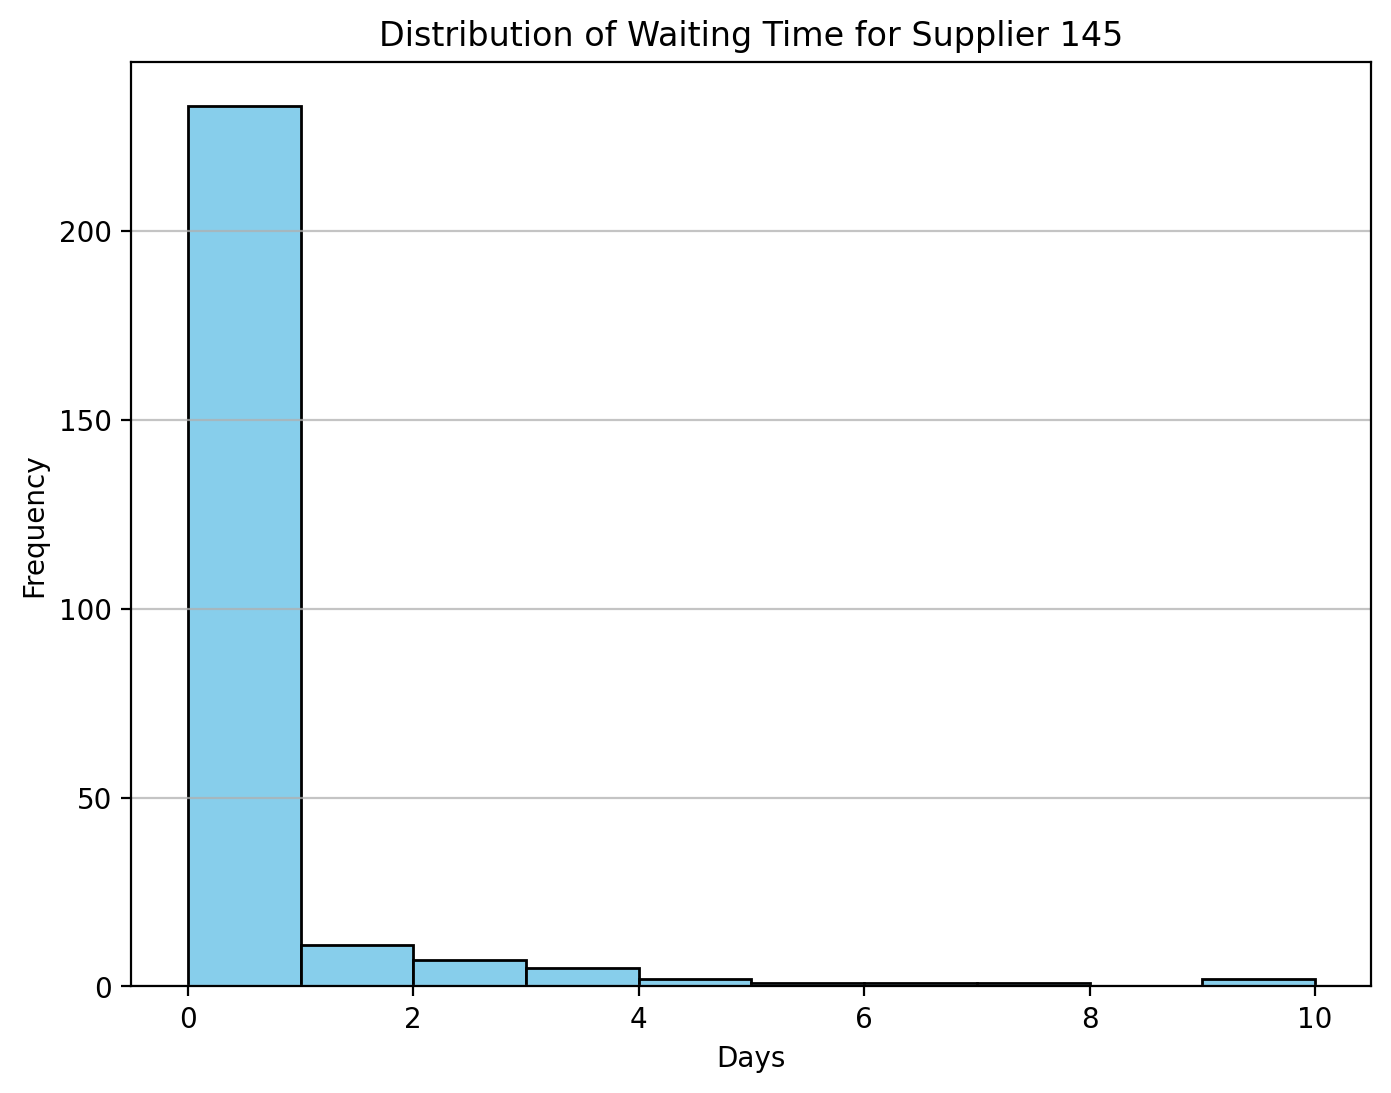

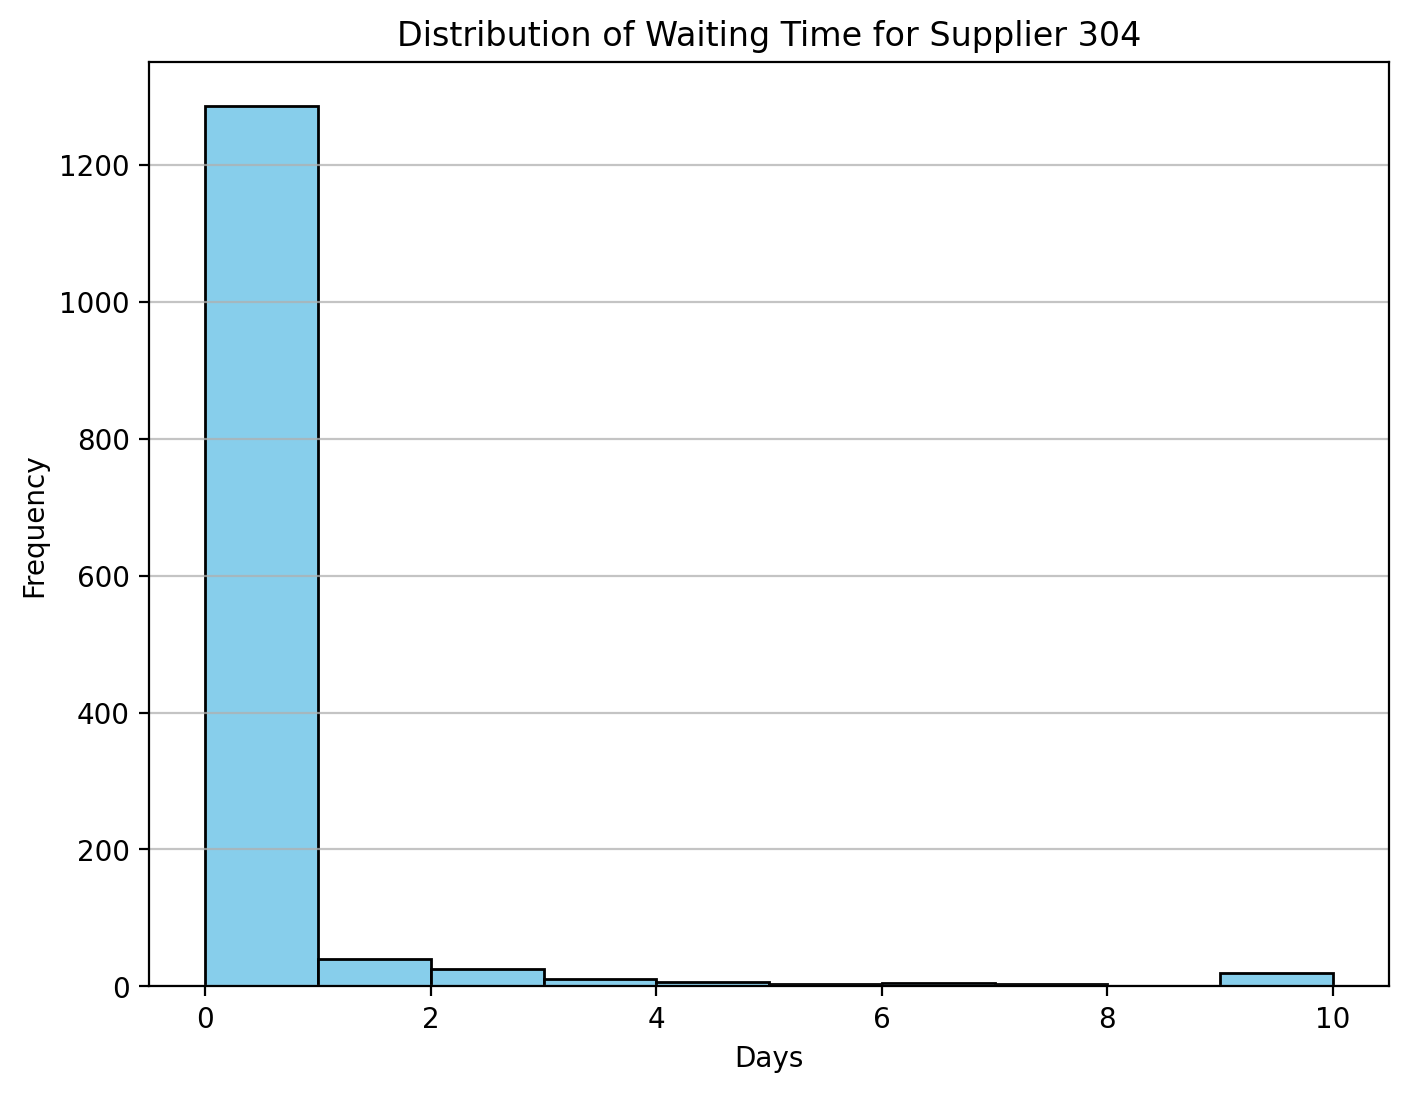

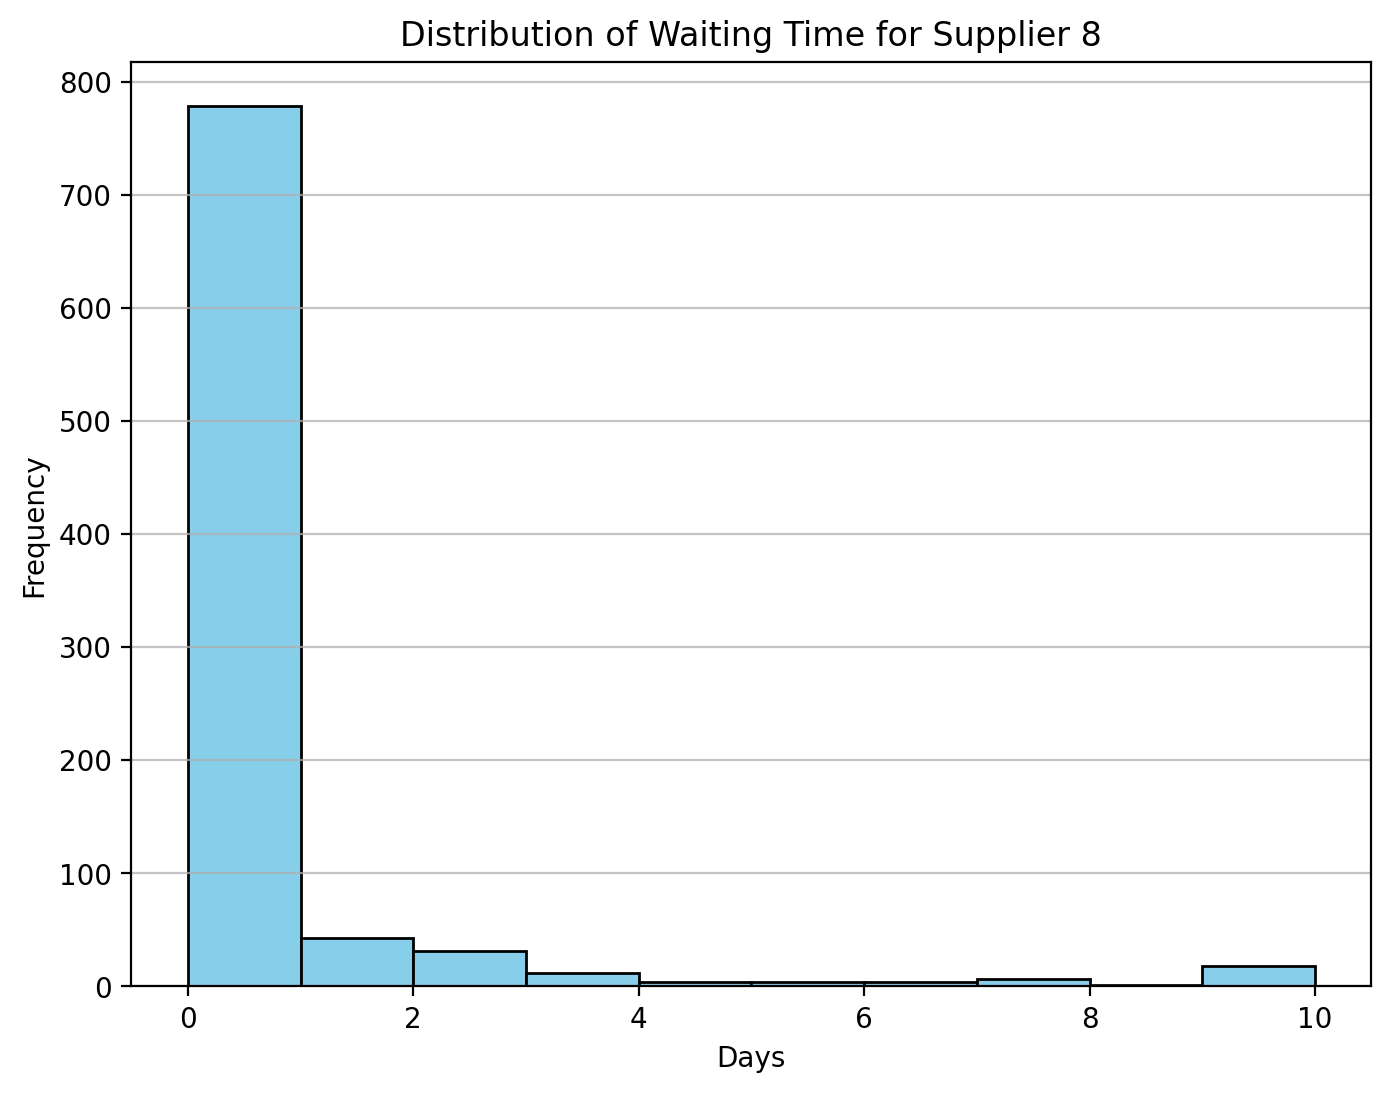

In [197]:
locations = [1, 14, 442, 145, 304, 8]

for location in locations:
    data_location = df2[df2['supplier_id'] == location]['days']
    
    num_rows_location = len(data_location)  # Количество строк в текущей локации
    
    if num_rows_location >= 100:
        data_location_capped = np.minimum(data_location, 10)  # Ограничение значений days до 10
        
        plt.figure(figsize=(8, 6))
        plt.hist(data_location_capped, bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of Waiting Time for Supplier {location}')
        plt.xlabel('Days')
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

    Существует статистически значимая разница во времени ожидания заказа между БЕ.

### Анализ зависимости при NOT CANCELED относительно БЕ

In [172]:
locations = df2['legal_entity'].unique()
results = []

for location in locations:
    data_location = df2[df2['legal_entity'] == location]['days']
    
    num_rows_location = len(data_location)  # Количество строк в текущей локации
    
    if num_rows_location >= 100:
        other_locations = df2[df2['legal_entity'] != location]['days']
        
        # Проведение критерия Манна-Уитни
        stat, p_value = mannwhitneyu(data_location, other_locations, alternative='two-sided')
        
        results.append({'location': location, 'p_value': p_value, 'num_rows': num_rows_location})

# Сортировка результатов по увеличению p-value
results.sort(key=lambda x: x['p_value'])

for result in results:
    print(f"Локация: {result['location']}, Количество строк: {result['num_rows']}, p-value: {result['p_value']}\n")

# Вывод
if results[0]['p_value'] < 0.05:
    print("Существует статистически значимая разница во времени ожидания заказа между локациями.")
else:
    print("Нет статистически значимой разницы во времени ожидания заказа между локациями.")

Локация: АО «СУЭК-Кузбасс», Количество строк: 1228, p-value: 2.1437064014439036e-11

Локация: АО “Полюс Красноярск”, Количество строк: 3437, p-value: 6.160862252337406e-05

Локация: АО «СУЭК-Красноярск», Количество строк: 1218, p-value: 0.0002470272572887924

Локация: АО «Полюс Алдан», Количество строк: 279, p-value: 0.0061157445318714984

Локация: АО «Полюс Магадан», Количество строк: 878, p-value: 0.00836334990734929

Локация: ПАО "НЛМК", Количество строк: 820, p-value: 0.028790113151850687

Локация: ООО "ЕвроХим-ВолгаКалий", Количество строк: 347, p-value: 0.06616208006332086

Локация: АО «Полюс Вернинское», Количество строк: 333, p-value: 0.08093539453158848

Локация: ООО "НовомосковскРСС", Количество строк: 210, p-value: 0.09966423806460031

Локация: АО "НАК "Азот", Количество строк: 485, p-value: 0.11682468846087599

Локация: АО «Полюс Логистика», Количество строк: 2139, p-value: 0.2863246422017828

Локация: АО "Невинномысский Азот", Количество строк: 107, p-value: 0.908092072229

    Гипотеза подтверждена: Существует статистически значимая разница во времени ожидания заказа между локациями.
    
#### Необходимо проверить гипотезу с БЕ, превышающими среднее распределение в днях

In [212]:
locations = df2['legal_entity'].unique()
results = []

for location in locations:
    data_location = df2[df2['legal_entity'] == location]['days']
    
    num_rows_location = len(data_location)  # Количество строк в текущей локации
    
    if num_rows_location >= 100:
        other_locations = df2[df2['legal_entity'] != location]['days']
        
        # Проведение критерия Манна-Уитни
        stat, p_value = mannwhitneyu(data_location, other_locations, alternative='greater')  # Используем одностороннюю гипотезу
        
        results.append((location, num_rows_location, p_value))

# Сортировка результатов по возрастанию p-value
results_sorted = sorted(results, key=lambda x: x[2])

for result in results_sorted:
    location, num_rows_location, p_value = result
    if p_value < 0.05:
        print(f"БЕ: {location}, Количество строк: {num_rows_location}, p-value: {p_value}")
        print("Распределение времени ожидания заказа данной БЕ статистически больше, чем у других.\n")
    else:
        print(f"БЕ: {location}, Количество строк: {num_rows_location}, p-value: {p_value}")
        print("Распределение времени ожидания заказа данной БЕ статистически НЕ больше, чем у других.\n")

БЕ: АО “Полюс Красноярск”, Количество строк: 3437, p-value: 3.080431126168703e-05
Распределение времени ожидания заказа данной БЕ статистически больше, чем у других.

БЕ: АО «Полюс Алдан», Количество строк: 279, p-value: 0.0030578722659357492
Распределение времени ожидания заказа данной БЕ статистически больше, чем у других.

БЕ: АО «Полюс Магадан», Количество строк: 878, p-value: 0.004181674953674645
Распределение времени ожидания заказа данной БЕ статистически больше, чем у других.

БЕ: ПАО "НЛМК", Количество строк: 820, p-value: 0.014395056575925344
Распределение времени ожидания заказа данной БЕ статистически больше, чем у других.

БЕ: ООО "ЕвроХим-ВолгаКалий", Количество строк: 347, p-value: 0.03308104003166043
Распределение времени ожидания заказа данной БЕ статистически больше, чем у других.

БЕ: ООО "НовомосковскРСС", Количество строк: 210, p-value: 0.04983211903230016
Распределение времени ожидания заказа данной БЕ статистически больше, чем у других.

БЕ: АО «Полюс Логистика»,

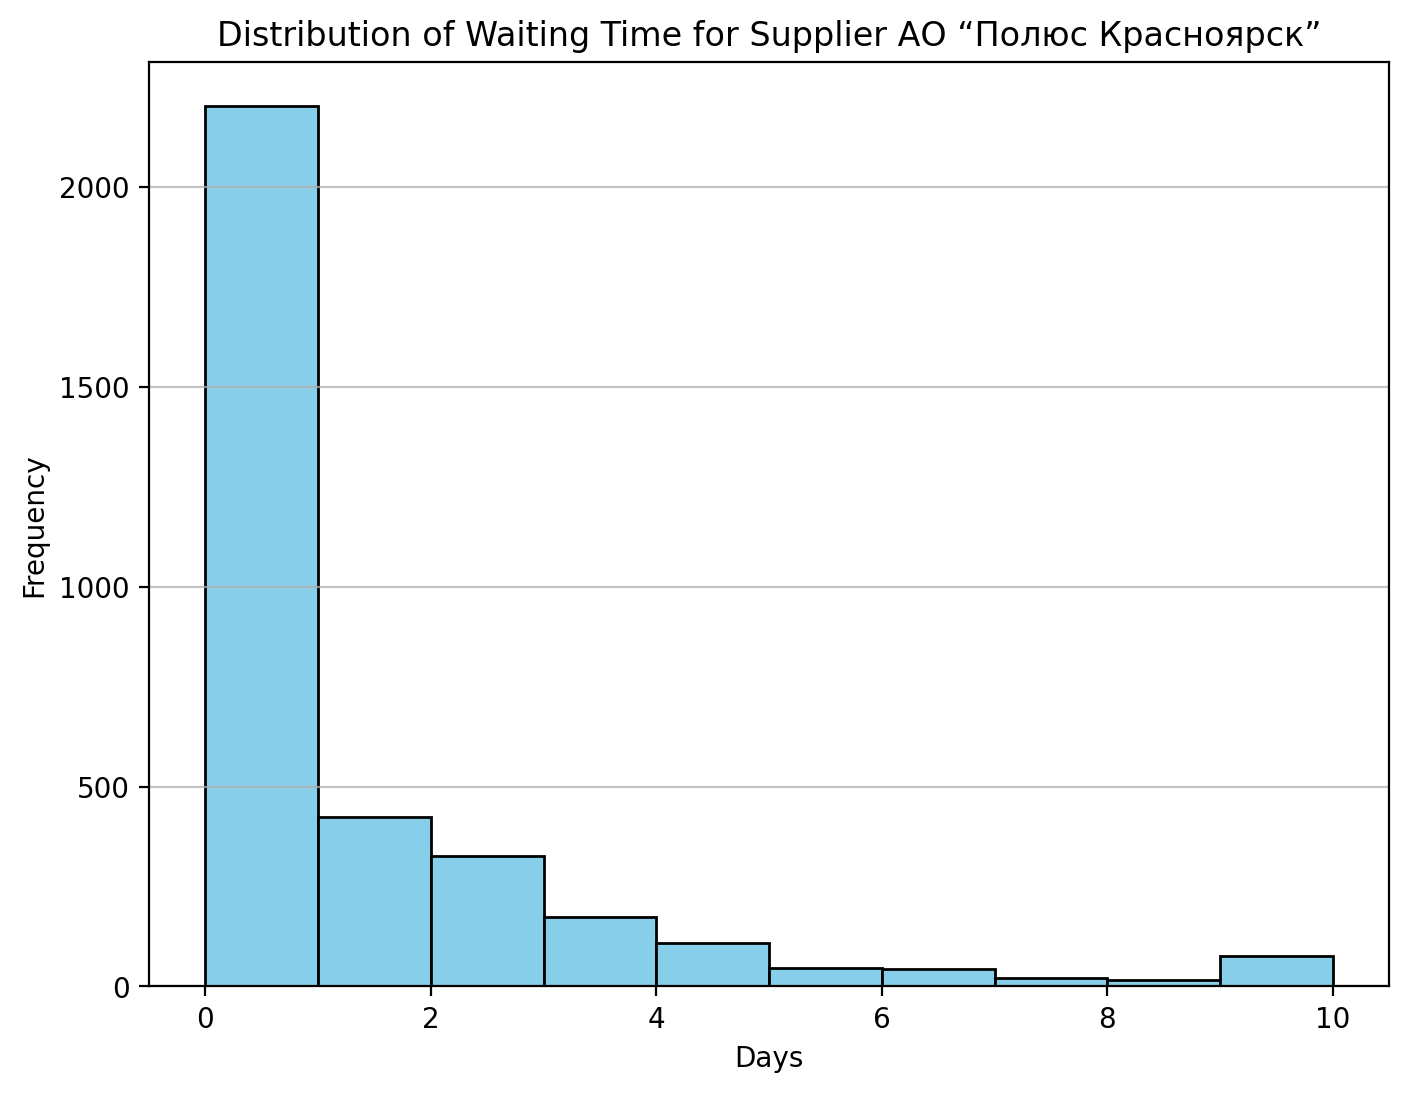

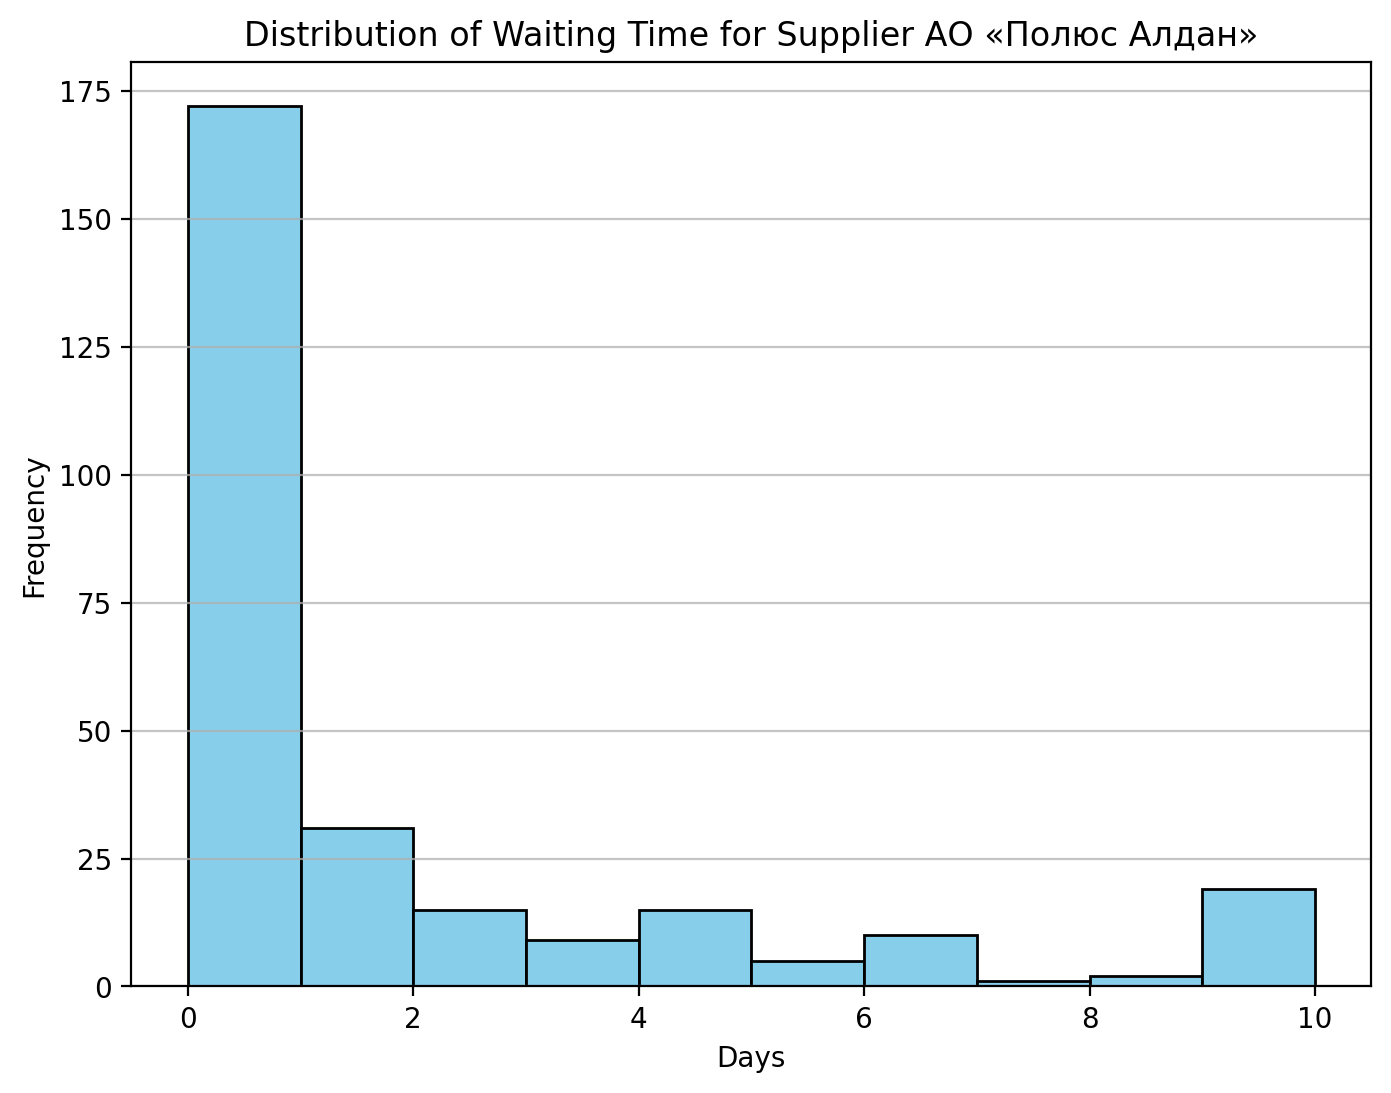

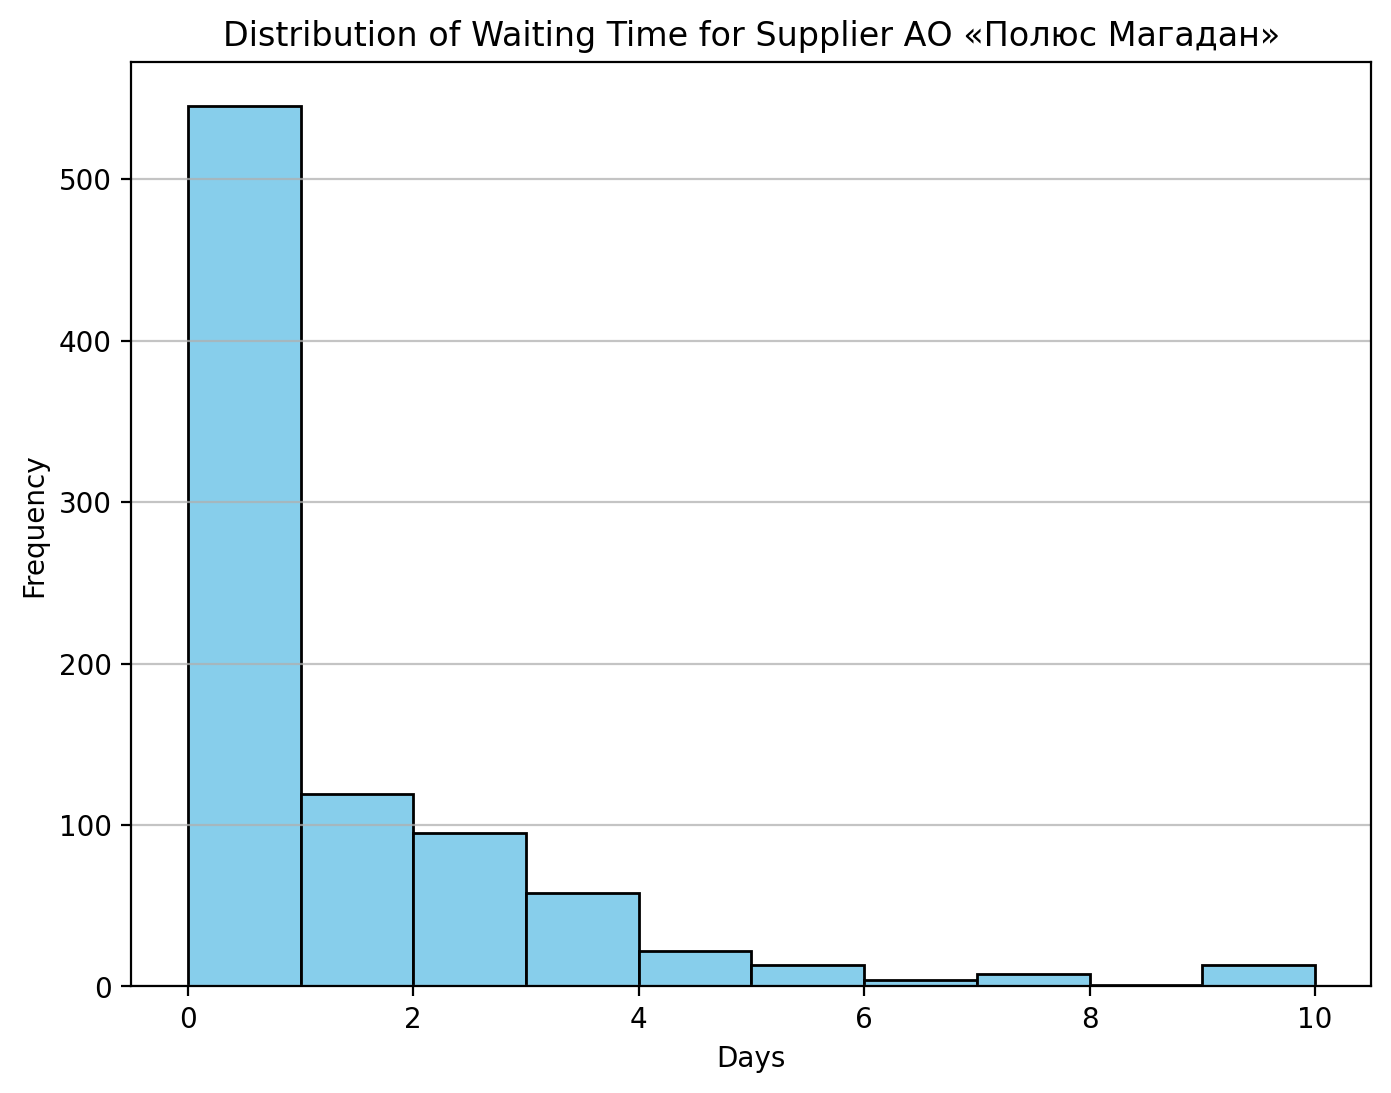

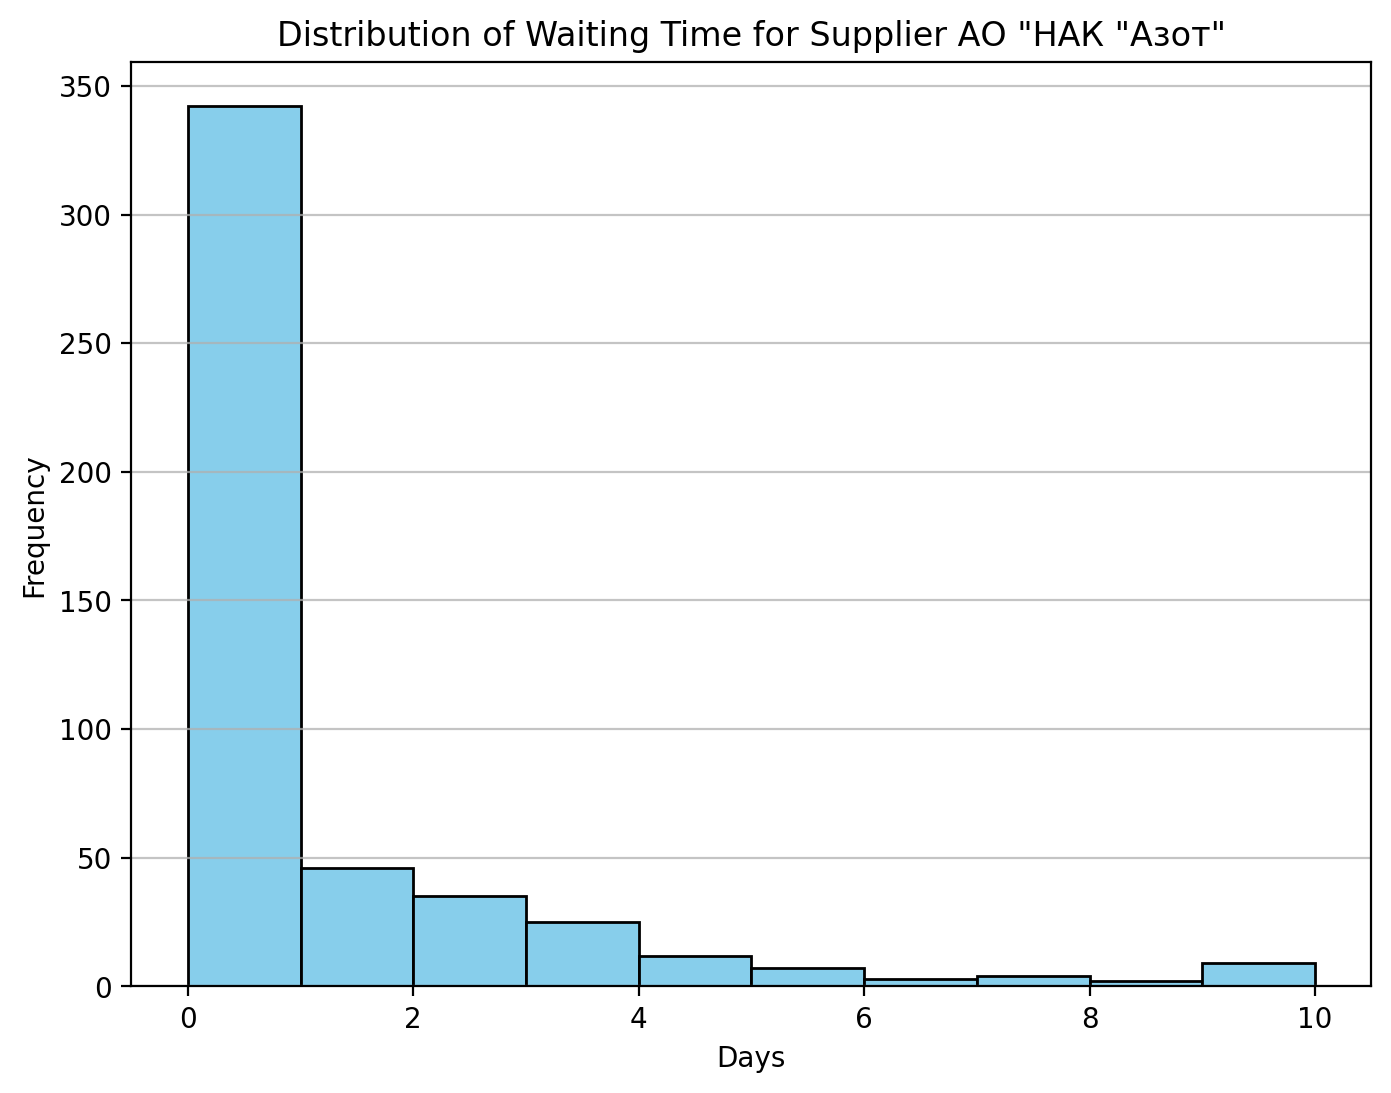

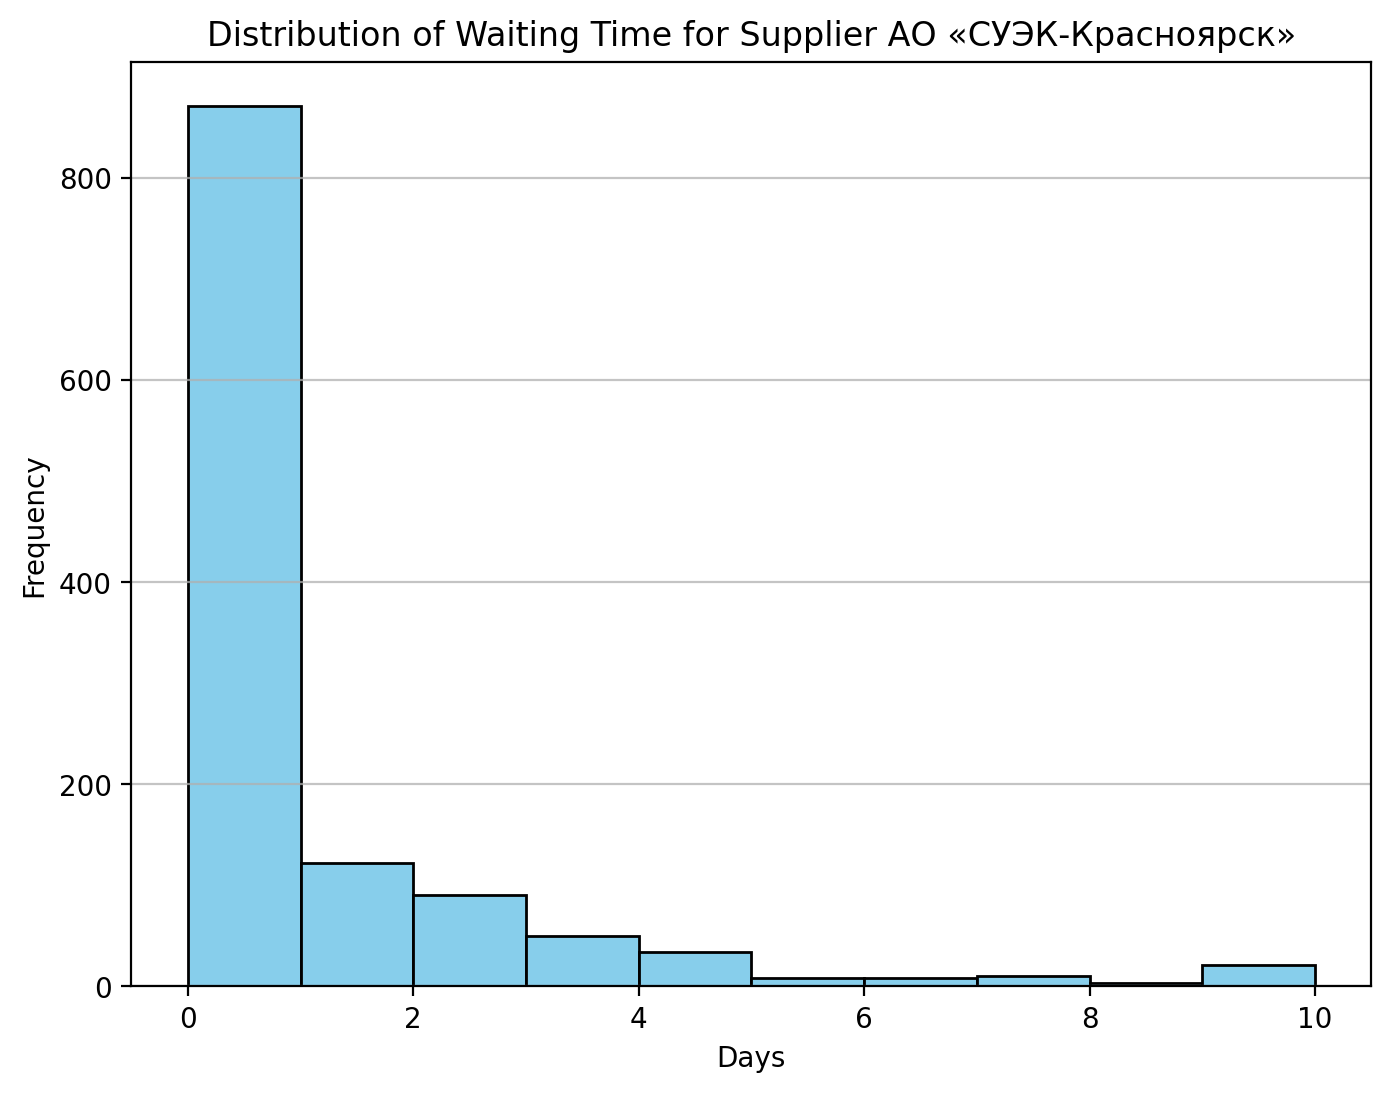

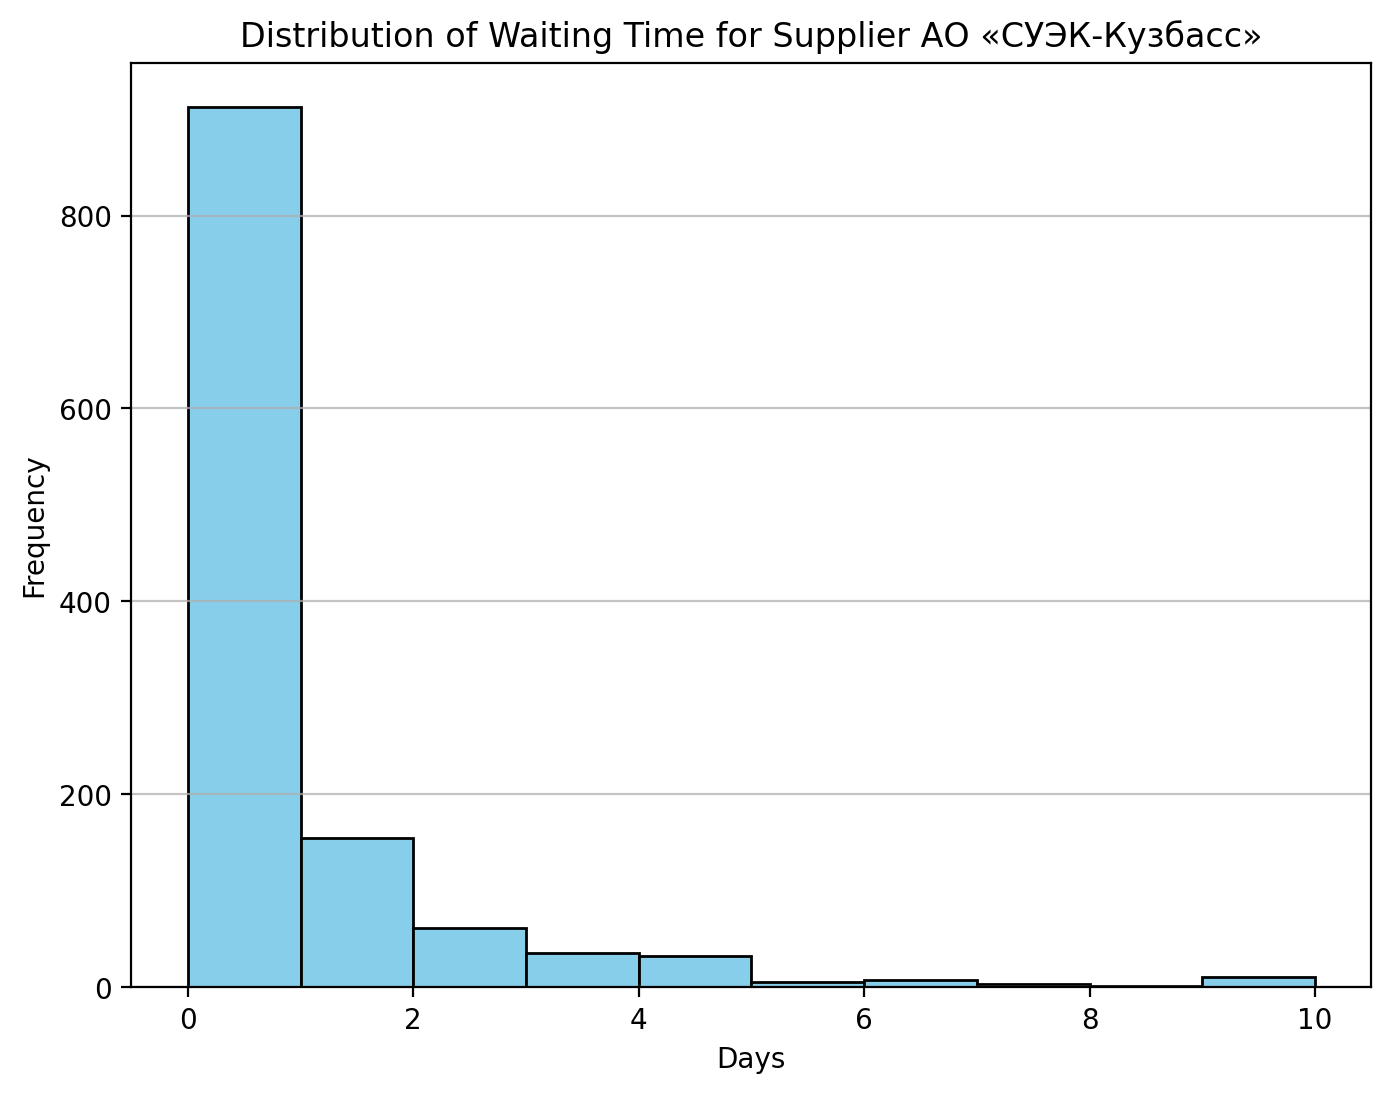

In [206]:
locations = ['АО “Полюс Красноярск”', 'АО «Полюс Алдан»', 'АО «Полюс Магадан»', 'АО "НАК "Азот"', 'АО «СУЭК-Красноярск»', 'АО «СУЭК-Кузбасс»']

for location in locations:
    data_location = df2[df2['legal_entity'] == location]['days']
    
    num_rows_location = len(data_location)  # Количество строк в текущей локации
    
    if num_rows_location >= 100:
        data_location_capped = np.minimum(data_location, 10)  # Ограничение значений days до 10
        
        plt.figure(figsize=(8, 6))
        plt.hist(data_location_capped, bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of Waiting Time for Supplier {location}')
        plt.xlabel('Days')
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

    Зависимость БЕ в увеличение продолжительности согласования на взгляд не так очевидна, как зависимость поставщика, однако статистически она есть.

In [215]:
average_time = df2.groupby('legal_entity')['second'].mean()/(60*60*24)
average_time = average_time.reset_index()
average_time.rename(columns={'second': 'days'}, inplace=True)
average_time['days'] = round(average_time['days'], 2)
average_time = average_time.sort_values('days', ascending=False)

# считаем количество значений в каждом legal_entity
count_values = df2['legal_entity'].value_counts().reset_index()
count_values.columns = ['legal_entity', 'value_count']

# объединяем с average_time
average_time = average_time.merge(count_values, on='legal_entity')

# удаляем все строки с suboffer_count < 200 из-за недостатка инфы
average_time.drop(average_time[average_time['value_count'] < 10].index, inplace=True)
average_time.rename(columns={'value_count': 'suboffer_count'}, inplace=True)

initial_count_days_gt_10 = df2[df2['days'] > 10].groupby('legal_entity').size().reset_index(name='10+ days')
average_time = average_time.merge(initial_count_days_gt_10, on='legal_entity', how='left')
average_time.fillna(0, inplace=True)

average_time['%'] = (average_time['10+ days'] / average_time['suboffer_count']) * 100

average_time

,legal_entity,days,suboffer_count,10+ days,%
0,АО «Полюс Алдан»,2.54,279,15.0,5.376344
1,"АО ""Невинномысский Азот""",2.27,107,6.0,5.607477
2,"ООО ""ЕвроХим-ВолгаКалий""",1.92,347,8.0,2.305476
3,АО «Полюс Вернинское»,1.79,333,7.0,2.102102
4,ООО «ЕСК-СУЭК»,1.74,236,8.0,3.389831
5,"ПАО ""НЛМК""",1.69,820,12.0,1.463415
6,АО «Полюс Логистика»,1.59,2139,52.0,2.431043
7,АО “Полюс Красноярск”,1.50,3437,51.0,1.483852
8,АО «Полюс Магадан»,1.39,878,9.0,1.025057
9,"АО ""НАК ""Азот""",1.34,485,9.0,1.855670


    Наиболее значимые БЕ для проверки:
        АО «Полюс Алдан»
        АО "Невинномысский Азот"
        ООО "ЕвроХим-ВолгаКалий"
        АО «Полюс Вернинское»
        ООО «ЕСК-СУЭК»
        
        АО “Полюс Красноярск”
        ПАО "НЛМК"
        АО «Полюс Магадан»
        ООО "НовомосковскРСС"
        
    ООО "ЕвроХим-ВолгаКалий", АО «Полюс Алдан» - первый приоритет.
    
    Для прочих БЕ возможен недостаток подзаказов (данных), чтобы сделать однозначный вывод.
        

In [ ]:
legal_entity_counts = df1_copy['legal_entity'].value_counts()
legal_entities_to_keep = legal_entity_counts[legal_entity_counts >= 100].index

df_filtered = df1_copy[df1_copy['legal_entity'].isin(legal_entities_to_keep)]

for legal_entity in df_filtered['legal_entity'].unique():
    plt.figure(figsize=(11, 4))
    plt.hist(df_filtered[df_filtered['legal_entity'] == legal_entity]['days'], bins=10, range=(0, 10))
    plt.title(f'Days for {legal_entity}')
    plt.xlabel('days')
    plt.ylabel('Frequency')
    plt.show()

# Общие выводы:
    
### Подтверждение подзаказов, что в итоге стали отмененными (CANCELED) гарантированно занимает наибольшее количество дней. Необходим отдельный анализ.

### Разница продолжительности в днях относительно статуса наличия 'available' - являются статистической погрешностью.

### Существует статистически значимая разница во времени ожидания заказа от Поставщика.

### Существует статистически значимая разница во времени ожидания заказа между БЕ.
##### Стоит отметить, что у поставщика и БЕ низкая корреляция, значит проблема с Поставщиком и БЕ существуют по отдельности, однако зависимость БЕ не так очевидна, как зависимость поставщика.

### АО «Полюс Алдан», ООО "ЕвроХим-ВолгаКалий"  - первый приоритет для выяснения причины задержек.

### Работа в урегулировании согласования поставщиков в частности является задачей первого приоритета в рамках урегулирования процессов.